In [1]:
#%matplotlib inline
import torch
import numpy as np
from model import Generator
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
PATH = "model.pth.tar"

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64
ngpu = 1

mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

In [3]:
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
netG = Generator(ngpu, nz, ngf, nc).to(device)

In [4]:
netG.load_state_dict(torch.load(PATH))

In [5]:
noise = torch.randn(1, nz, 1, 1, device=device)

In [27]:
fake = netG(noise).detach().cpu().numpy()[0]
pixels = np.transpose(fake, (1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


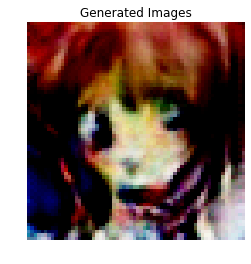

In [30]:
fig = plt.figure(figsize=(4, 4))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(pixels)